In [1]:
import sys
import itertools

import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.stats import zscore

from tqdm import tqdm

import neuroseries as nts


import time
import matplotlib.pyplot as plt
# %matplotlib qt

import seaborn as sns 
import bk.load
import bk.compute
import bk.plot

import os
%load_ext memory_profiler
import cProfile

In [82]:
import matplotlib as mpl
COLOR = 'white'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['axes.edgecolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR
# mpl.rcParams['figure.facecolor'] = '#282C34'
# mpl.rcParams['axes.facecolor'] = '#282C34'
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Sawasdee'
# %matplotlib qt

In [83]:
def population_rates(neurons,binSize = 0.025,start=0,end=None):
    t,binned = bk.compute.binSpikes(neurons,binSize,start,end)
    pop = binned.sum(0)
    return t,pop

In [84]:
bk.load.current_session_linux()
states = bk.load.states()
lfp = bk.load.lfp(123,0,5000)
neurons,metadata = bk.load.loadSpikeData(bk.load.path)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


/home/billel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/billel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/billel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/billel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/billel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/billel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: Run

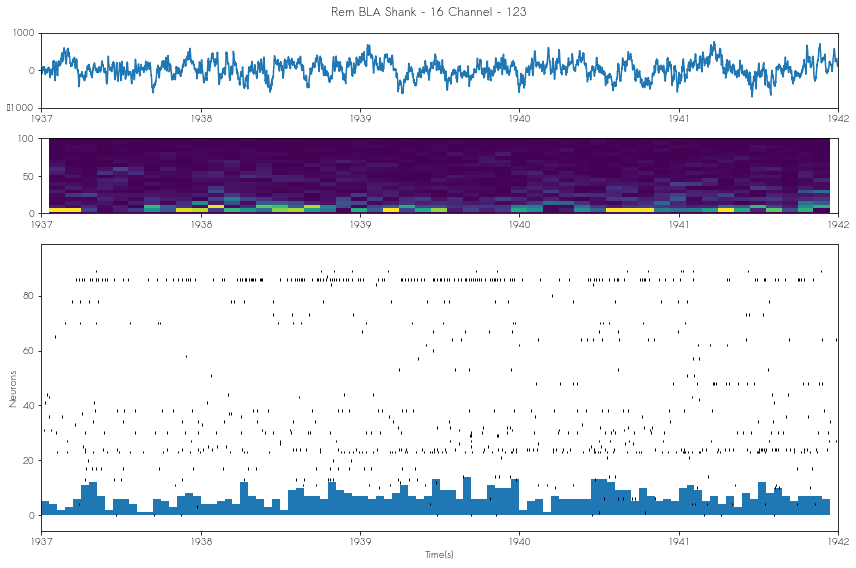

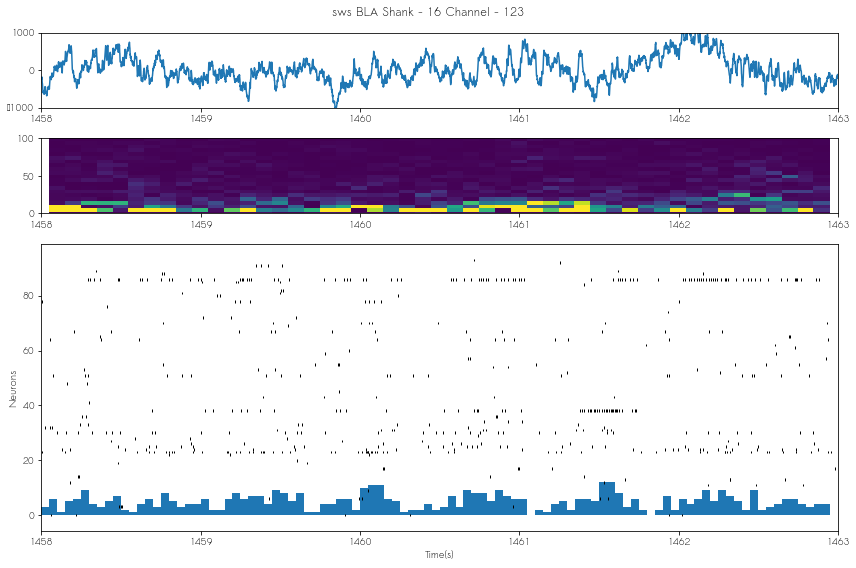

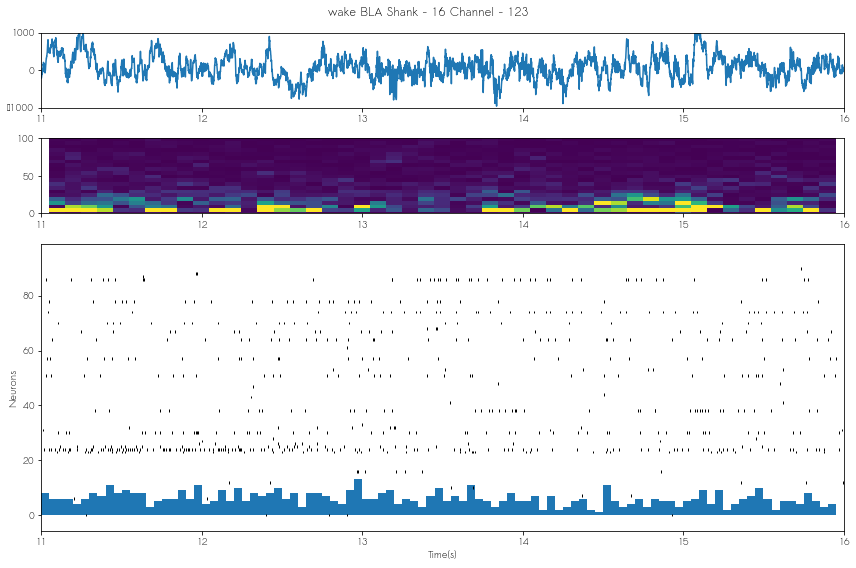

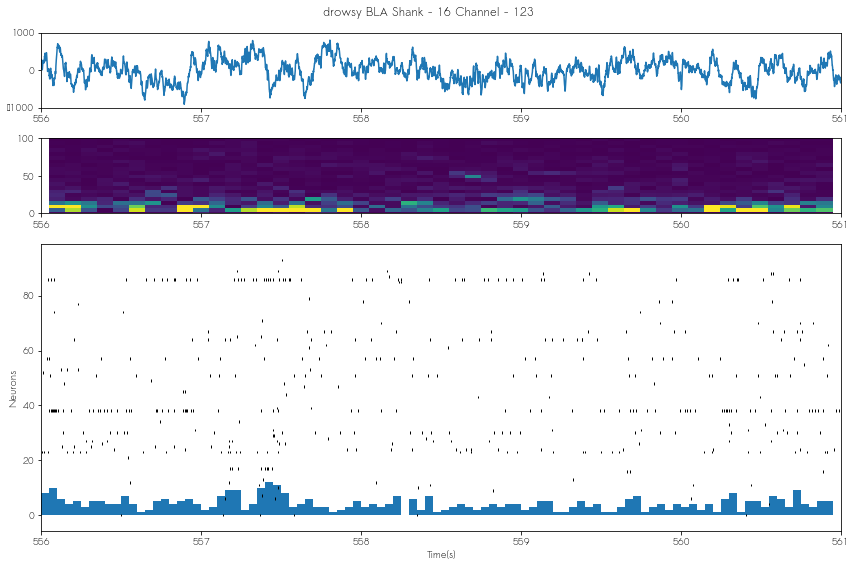

In [94]:
for s,intervals in states.items():
    intervals = intervals.drop_short_intervals(5)

    t_start = intervals.as_units('s').iloc[0][0]+10
    t_end = t_start + 5
    
    t_pop,p = population_rates(neurons[metadata.Region == 'BLA'],0.050,t_start,t_end)
    lfp_state = lfp.restrict(intervals)
    
    
    f,t,Sxx = scipy.signal.spectrogram(lfp_state.as_units('s')[t_start:t_end].values,1250,nperseg=250,noverlap=125)
    fig,ax = plt.subplot_mosaic('''A
                                   B
                                   C
                                   C
                                   C
                                ''',figsize = [12,8])
    
    ax['A'].plot(lfp_state.as_units('s')[t_start:t_end])
    ax['A'].set_ylim([-1000, 1000])
    ax['A'].set_xlim([t_start,t_end])
    
    plt.sca(ax['B'])
    plt.pcolormesh(t+t_start, f, Sxx, shading='auto')
    plt.xlim([t_start,t_end])
    plt.ylim([0,100])
    plt.clim([0, 5000])
    
    plt.sca(ax['C'])
    bk.plot.rasterPlot(neurons[metadata.Region == 'BLA'],[t_start,t_end],width=1)
    plt.bar(t_pop,p,t_pop[1]-t_pop[0])
    plt.xlim([t_start,t_end])
    
    
    plt.suptitle(s + ' BLA Shank - 16 Channel - 123')
    plt.tight_layout()
    plt.savefig(f'/mnt/work/Figures Gabrielle/{s}-BLA-S16C123.png',dpi = 300)